# PROJET 03 : TRAITEMENT DE DONNEES NUTRITIONELLES  01/04

# Importation des librairies necessaires au projet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from langdetect import detect
#import re
#import langdetect
#from langdetect import detect
#from langdetect import detect_langs
%matplotlib inline
#To show all rows and colum
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Chargement du Dataset

In [2]:
# upload du dataset 
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t')

C:\Users\AMC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Apercu du dataset

In [3]:
df.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN


In [4]:
df.tail(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320771,999990026839,http://world-fr.openfoodfacts.org/produit/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# TAILLE DU DATASET
df.shape

(320772, 162)

In [6]:
# Affichage des divers types des colonnes du dataset
df.dtypes.value_counts()

float64    106
object      56
dtype: int64

In [7]:
# Resultat d'analyse descriptive via la commande 'describe'
# Le tableau nous permet d'avoir un apercu rapide sur certains parametres statistques et une 
# idee sur les outliers et les valeurs aberrantes
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


# Traitement et nettoyage du dataset 

In [8]:
# Donne le nombre de colonnes qui ne sont pas completement nulles
df.notnull().any().sum()

146

In [9]:
# Identification des colonnes completement nulles
x= pd.DataFrame(df.isna().all())
x.value_counts()

False    146
True      16
dtype: int64

In [10]:
# Determination du total de valeur manquantes 
print ('nombre de valeurs manquantes  =', df.isna().sum().sum())

nombre de valeurs manquantes  = 39608589


In [11]:
# Determination du ratio de remplissage 
nombre_data = 320772 * 162
Ratio = df.isna().sum().sum()/nombre_data
print('Ratio de remplissage du dataset  = ',(1-Ratio)*100,'%')

Ratio de remplissage du dataset  =  23.77842736804866 %


In [12]:
# Affichage des colonnes du dataset
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [13]:
# Identification des colonnes et appreciation du contenu de chaque colonne :
# La taille de chaque serie nous donne un apercu sur la diversite des donnees

In [14]:
df['product_name'].value_counts()

Ice Cream                                   410
Extra Virgin Olive Oil                      303
Potato Chips                                281
Premium Ice Cream                           226
Tomato Ketchup                              182
                                           ... 
18 dosettes universelles                      1
B-Fresh, Sugar Free Gum, Cinnamon             1
Chocolate Brownie Cookies, Thin & Crispy      1
Sirop de fraise pur sucre                     1
Mini galettes de riz Sweet Chili              1
Name: product_name, Length: 221347, dtype: int64

In [15]:
df['url'].value_counts()

http://world-fr.openfoodfacts.org/produit/0041270029599/unpeeled-apricot-halves-in-heavy-syrup-iga      1
http://world-fr.openfoodfacts.org/produit/0062482016009/woolwich-dairy-inc-triple-creme-goat-brie       1
http://world-fr.openfoodfacts.org/produit/4029764001869/club-mate-winter-edition-loscher-gmbh-co-kg     1
http://world-fr.openfoodfacts.org/produit/0041380064046/sliced-pickled-beets-springfield                1
http://world-fr.openfoodfacts.org/produit/3415581580006/original-collection-haagen-dazs                 1
                                                                                                       ..
http://world-fr.openfoodfacts.org/produit/8712439030801/monki-tahin-ohne-salz-330-gr-glas               1
http://world-fr.openfoodfacts.org/produit/2000000007994/scrocchi-au-sesame-laurieri-srl                 1
http://world-fr.openfoodfacts.org/produit/3596710431670/auchan                                          1
http://world-fr.openfoodfacts.org/produit/3700

In [16]:
df['creator'].value_counts()

usda-ndb-import               169868
openfoodfacts-contributors     40117
kiliweb                        13891
date-limite-app                11918
openfood-ch-import             11478
                               ...  
gpct                               1
ecubes                             1
eliah                              1
jay-anece                          1
michelekd                          1
Name: creator, Length: 3535, dtype: int64

In [17]:
df['created_t'].value_counts()

1489055829    20
1489077120    20
1489050353    19
1489077322    18
1489077002    17
              ..
1474136617     1
1473289451     1
1440298080     1
1489865265     1
1465647103     1
Name: created_t, Length: 189636, dtype: int64

In [18]:
df['created_datetime'].value_counts()

2017-03-09T10:37:09Z    20
2017-03-09T16:32:00Z    20
2017-03-09T09:05:53Z    19
2017-03-09T16:35:22Z    18
2017-03-09T16:30:02Z    17
                        ..
2014-12-20T19:43:21Z     1
2015-07-04T17:02:18Z     1
2015-03-17T12:54:05Z     1
2016-02-24T12:34:06Z     1
2012-06-18T17:03:57Z     1
Name: created_datetime, Length: 189568, dtype: int64

In [19]:
df['generic_name'].value_counts()

Pâtes alimentaires au blé dur de qualité supérieure                                                    201
Aliment pour bébés                                                                                      92
Pâtes alimentaires de qualité supérieure                                                                82
Jambon cuit supérieur                                                                                   80
Jus d'orange                                                                                            73
                                                                                                      ... 
formaggio a pasta filata                                                                                 1
Cookies aux amande                                                                                       1
Croque Monsieur au fromage fondu et au jambon cuit choix                                                 1
Sal Liquida con Tequila              

In [20]:
df['packaging'].value_counts()

Carton                                                                                                             2153
Sachet,Plastique                                                                                                   2141
Plastique                                                                                                          1902
Bouteille,Verre                                                                                                    1342
Kunststoff                                                                                                         1331
                                                                                                                   ... 
Bouteille,Frais,Pasteurisé,bouteille                                                                                  1
Frais,Barquette,Plastique,Opercule,Film plastique,Barquettes détachables,Sous-vide,Etui,Carton,Ouverture facile       1
carton,Pot en plastique                 

In [21]:
df['packaging_tags'].value_counts()

sachet,plastique                  3959
carton                            2927
plastique                         2793
barquette,plastique               2136
bouteille,verre                   1668
                                  ... 
verpackv-5,verpackv-pp,packung       1
boite-carton-et-papier-alu           1
plastica,r-pet                       1
крышка-41,стакан-05                  1
carton,brique-carton                 1
Name: packaging_tags, Length: 12064, dtype: int64

In [22]:
df['brands'].value_counts()

Carrefour                             2978
Auchan                                2340
U                                     2050
Meijer                                1995
Leader Price                          1700
                                      ... 
Big Train                                1
Vermont creamery, Verment Creamery       1
Kinder Bueno,Ferrero,Kinder              1
Trade Joe's                              1
Dipa                                     1
Name: brands, Length: 58784, dtype: int64

In [23]:
df['brands_tags'].value_counts()

carrefour                   3149
auchan                      2468
u                           2082
meijer                      1996
leader-price                1899
                            ... 
angry-birds,rovio              1
nestle,maggi                   1
copechamp                      1
caddy-shack                    1
the-pickle-juice-company       1
Name: brands_tags, Length: 50253, dtype: int64

In [24]:
df['categories'].value_counts()

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                                                301
Biscuits                                                                                                                                                                                  287
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                                           247
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner                          222
Bonbons                                                                                                                                                                                   217
                                                  

In [25]:
df['categories_tags'].value_counts()

en:sugary-snacks,en:biscuits-and-cakes,en:biscuits                                                                                                  802
en:sugary-snacks,en:chocolates,en:dark-chocolates                                                                                                   609
en:sugary-snacks,en:confectioneries,en:candies                                                                                                      526
en:plant-based-foods-and-beverages,en:plant-based-foods,en:breakfasts,en:cereals-and-potatoes,en:cereals-and-their-products,en:breakfast-cereals    522
en:sugary-snacks,en:biscuits-and-cakes,en:biscuits,en:chocolate-biscuits                                                                            465
                                                                                                                                                   ... 
en:seafood,en:fishes,en:meals,en:fish-fillets,en:microwave-meals,en:meals-with-fish,en:s

In [26]:
df['categories_fr'].value_counts()

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                          802
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                                             609
Snacks sucrés,Confiseries,Bonbons                                                                                                                                   526
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner    522
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                     465
                                                                                                                                                                

In [27]:
df['origins'].value_counts()

France                                                                                      5171
España                                                                                       569
Italie                                                                                       473
Australia                                                                                    434
Union Européenne                                                                             428
                                                                                            ... 
Cádiz (provincia),Andalucía,España                                                             1
Spain,Italy,Greece,Tunisia                                                                     1
France,coopérative CORAB Poitou-Charente,agriculture UE / non UE                               1
Farine-beurre-œufs,Bretagne-Vendée-Poitou,Sel,Noirmoutier,Vendée,Pays de la Loire,France       1
Sri Lanka,Ceylan              

In [28]:
df['origins_tags'].value_counts()

france                                             5303
union-europeenne                                    625
espana                                              589
italie                                              506
espagne                                             454
                                                   ... 
zi-les-giraumeries,saint-berthevin,france             1
kakao,papua-neuguinea                                 1
vertou,france                                         1
belgien,deutschland,ecuador                           1
amerique-latine,picardie,france,haute-normandie       1
Name: origins_tags, Length: 4372, dtype: int64

In [29]:
df['manufacturing_places'].value_counts()

France                                                                                                                9371
Italie                                                                                                                1251
Deutschland                                                                                                            776
Belgique                                                                                                               744
Suisse                                                                                                                 683
                                                                                                                      ... 
European Seafood Investments Portugal SA Avenida Mons. Manuel Bastos Rodrigues de Sousa 2520-206 PENICHE  Portugal       1
Montornés del Vallés,Barcelona (provincia),Cataluña,España                                                               1
Neu-Isenburg,All

In [30]:
df['manufacturing_places_tags'].value_counts()

france                                             9451
italie                                             1278
deutschland                                         778
belgique                                            754
suisse                                              697
                                                   ... 
33650                                                 1
tourcoing,france                                      1
region-parisienne,france                              1
lodosa                                                1
26790-tulette,drome,auvergne-rhone-alpes,france       1
Name: manufacturing_places_tags, Length: 6736, dtype: int64

In [31]:
df['labels'].value_counts()

Organic, EU Organic, fr:AB Agriculture Biologique                               3223
Point Vert                                                                      2053
Vegetariano,Vegano                                                              1048
Bio,Bio européen,AB Agriculture Biologique                                       979
Point Vert,Eco-Emballages                                                        609
                                                                                ... 
Sans sulfites,Sans conservateur                                                    1
Point Vert,Sans colorants artificiels,Sans conservateurs,Nutritional Compass       1
en:Not advised to pregnant women,en:18 ,en:No car,en:2340.fr                       1
Vegetariano, Vegano, Sin gluten                                                    1
SAFE,FAD free                                                                      1
Name: labels, Length: 18114, dtype: int64

In [32]:
df['labels_tags'].value_counts()

en:organic,en:eu-organic,fr:ab-agriculture-biologique                                                                                                         5311
en:green-dot                                                                                                                                                  2456
en:vegetarian,en:vegan                                                                                                                                        1654
en:green-dot,fr:eco-emballages                                                                                                                                 835
en:organic,en:eu-organic,en:fr-bio-01,fr:ab-agriculture-biologique                                                                                             830
                                                                                                                                                              ... 
en:no-colorings,en:sin

In [33]:
df['labels_fr'].value_counts()

Bio,Bio européen,AB Agriculture Biologique                                                                                                       5311
Point Vert                                                                                                                                       2456
Végétarien,Végétalien                                                                                                                            1654
Point Vert,Eco-emballages                                                                                                                         835
Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique                                                                                              830
                                                                                                                                                 ... 
Bio,Bio européen,Agriculture UE,FR-BIO-10,Point Vert,Fabriqué en France,AB Agriculture Biologique,Pr

In [34]:
df['emb_codes'].value_counts()

EMB 56251E                                                                   218
FR 85.154.002 EC                                                             128
EMB 49331H                                                                   105
FR 72.264.002 EC                                                             103
EMB 45273                                                                    102
                                                                            ... 
ES 26.06660/MU EC,LABORATORIOS ALMOND S.L.,QUESOS ARTESANOS DE LETUR S.A.      1
FR 85.222.009 EC,EMB 85222                                                     1
EMB 5651E                                                                      1
19 C06 L5                                                                      1
EMB 01390A                                                                     1
Name: emb_codes, Length: 8462, dtype: int64

In [35]:
df['emb_codes_tags'].value_counts()

emb-56251e                                                                                                            218
fr-85-154-002-ec                                                                                                      128
emb-49331h                                                                                                            105
fr-72-264-002-ec                                                                                                      103
emb-45273                                                                                                             102
                                                                                                                     ... 
fr-2b-332-001-ec,emb-20332a                                                                                             1
emb-36229,emb-45273,emb-67434                                                                                           1
uk-uw-020-ec            

In [36]:
df['first_packaging_code_geo'].value_counts()

47.633333,-2.666667    279
47.833333,-0.333333    245
49.266667,-0.666667    197
48.1,-4.333333         169
46.698333,-1.939444    164
                      ... 
45.9,6.283333            1
45.15,0.8                1
46.966667,-1             1
49.066667,-0.766667      1
47.933333,-1.233333      1
Name: first_packaging_code_geo, Length: 1602, dtype: int64

In [37]:
df['cities'].value_counts()

c    9
a    8
b    6
Name: cities, dtype: int64

In [38]:
df['cities_tags'].value_counts()

theix-morbihan-france                           270
douarnenez-finistere-france                     154
sable-sur-sarthe-sarthe-france                  146
saint-martin-des-entrees-calvados-france        136
mouilleron-en-pareds-vendee-france              134
                                               ... 
berou-la-mulotiere-eure-et-loir-france            1
maizey-meuse-france                               1
aurel-vaucluse-france                             1
saint-jeannet-alpes-de-haute-provence-france      1
turballe-loire-atlantique-france                  1
Name: cities_tags, Length: 2572, dtype: int64

In [39]:
df['purchase_places'].value_counts()

France                            11762
Lyon,France                        3101
Courrières,France                  2279
Madrid,España                      2000
Paris,France                       1935
                                  ...  
Würzburg,Deutschland,Stuttgart        1
Mur de Barrez,France                  1
Angers,France,Liévin, Paris           1
Clichy La Garenne                     1
Chavannes-près-renens,Suisse          1
Name: purchase_places, Length: 5120, dtype: int64

In [40]:
df['stores'].value_counts()

Carrefour                    6465
Auchan                       2869
Leclerc                      2826
Cora                         2274
Intermarché                  2224
                             ... 
Bio c'bon                       1
Lidl Lyon 3                     1
Auchan,Franprix,Super U         1
Super U,Hyper U,U Express       1
La Petite Marquise              1
Name: stores, Length: 3259, dtype: int64

In [41]:
df['countries'].value_counts()

US                                   169928
France                                77292
en:FR                                 16979
Suisse                                12314
Deutschland                            6161
                                      ...  
العراق,المملكة المتحدة, en:france         1
en:MV                                     1
South Korea                               1
Црна Гора,Србија                          1
Magyarország, Suisse                      1
Name: countries, Length: 1434, dtype: int64

In [42]:
df['countries_tags'].value_counts()

en:united-states                                                     172998
en:france                                                             94391
en:switzerland                                                        14953
en:germany                                                             7870
en:spain                                                               5009
                                                                      ...  
en:france,en:germany,en:netherlands                                       1
en:france,en:netherlands,en:spain,en:united-kingdom                       1
en:denmark,en:france,en:italy                                             1
en:belgium,en:france,en:germany,en:greece,en:netherlands,en:spain         1
en:switzerland,fr:deutschland,fr:frankreich,fr:spanien                    1
Name: countries_tags, Length: 725, dtype: int64

In [43]:
df['countries_fr'].value_counts()

États-Unis                                                      172998
France                                                           94392
Suisse                                                           14953
Allemagne                                                         7870
Espagne                                                           5009
                                                                 ...  
Australie,Vanuatu                                                    1
France,en:An                                                         1
Lituanie,Suède                                                       1
États-Unis,en:ประเทศออสเตรเลีย,en:ประเทศไทย,en:สหราชอาณาจักร         1
Belgique,France,Grèce,Italie,Espagne,Suisse,Royaume-Uni              1
Name: countries_fr, Length: 722, dtype: int64

In [44]:
df['ingredients_text'].value_counts()

Carbonated water, natural flavor.                                                                                                                                                                                                                                                                                                                                                             222
Almonds.                                                                                                                                                                                                                                                                                                                                                                                      219
Extra virgin olive oil.                                                                                                                                                                                                             

In [45]:
df['allergens'].value_counts()

blé                                                                                  1279
Lait                                                                                  829
lait                                                                                  702
soja                                                                                  513
sulfites                                                                              403
                                                                                     ... 
beurre, blé, beurre, crème, crème, lactiques, lait, fromages, fromage, lait, oeuf       1
centeio                                                                                 1
poisson, gluten, lait, lait                                                             1
blé, orge, avoine, seigle, sésame, blé, blé                                             1
Beurre, Lait, Lait, Lactosérum, Lait, babeurre, soja, crème, crème, lactose             1
Name: alle

In [46]:
df['allergens_fr'].value_counts()

http://fr.openfoodfacts.org/images/products/303/349/043/3864/front.3.200.jpg     1
http://fr.openfoodfacts.org/images/products/303/349/095/8008/front.8.200.jpg     1
http://fr.openfoodfacts.org/images/products/303/349/059/4510/front.20.200.jpg    1
http://fr.openfoodfacts.org/images/products/303/349/085/3570/front.6.200.jpg     1
http://fr.openfoodfacts.org/images/products/303/349/091/7463/front.5.200.jpg     1
http://fr.openfoodfacts.org/images/products/303/349/095/8213/front.8.200.jpg     1
http://fr.openfoodfacts.org/images/products/303/349/091/7418/front.10.200.jpg    1
http://fr.openfoodfacts.org/images/products/303/349/061/8889/front.12.200.jpg    1
http://fr.openfoodfacts.org/images/products/303/349/059/5517/front.4.200.jpg     1
http://fr.openfoodfacts.org/images/products/303/349/114/3021/front.6.200.jpg     1
http://fr.openfoodfacts.org/images/products/303/349/114/3014/front.17.200.jpg    1
http://fr.openfoodfacts.org/images/products/303/349/512/5016/front.8.200.jpg     1
http

In [47]:
df['traces'].value_counts()

Fruits à coque                                                                                                                1240
Lait                                                                                                                           557
Gluten                                                                                                                         514
Œufs                                                                                                                           416
Soja                                                                                                                           381
                                                                                                                              ... 
crustacés,poisson,mollusques,oeuf,fruits à coque,céleri,moutarde,soja,sésame                                                     1
Crustacés,Œufs,Poisson,Lait,Moutarde,Fruits à coque,Graines de sésame,Anhydride sul

In [48]:
df['traces_fr'].value_counts()

Fruits à coque                                                                                2051
Lait                                                                                           844
Œufs                                                                                           788
Gluten                                                                                         718
Fruits à coque,Arachides                                                                       564
                                                                                              ... 
Arachides,en:Milk-proteins,en:Other-nuts                                                         1
Gluten,Lait,Fruits à coque,Arachides,Anhydride sulfureux et sulfites,en:Seeds,en:Tree-nuts       1
Céleri,Crustacés,Œufs,Poisson,Moutarde,Fruits à coque,Graines de sésame                          1
Œufs,Gluten,Lait,Moutarde,Graines de sésame,Soja,Traces-eventuelles                              1
Lait,Soja,

In [49]:
df['traces_tags'].value_counts()

en:nuts                                                                                                          2051
en:milk                                                                                                           844
en:eggs                                                                                                           788
en:gluten                                                                                                         718
en:nuts,en:peanuts                                                                                                564
                                                                                                                 ... 
en:gluten,tr:hardal,tr:sut-urunu                                                                                    1
en:milk,fr:alcool                                                                                                   1
fr:traces-possibles-de-fruits-a-coque                   

In [50]:
df['serving_size'].value_counts()

240 ml (8 fl oz)        5496
28 g (1 oz)             5374
28 g (1 ONZ)            3770
15 ml (1 Tbsp)          2959
30 g (2 Tbsp)           2899
                        ... 
Une madeleine 21 g         1
110 g (2 STALKS)           1
35 g (1 PRETZEL ROD)       1
20 biscuits de 14 g.       1
5 churros 53 g             1
Name: serving_size, Length: 25423, dtype: int64

In [51]:
df['additives'].value_counts()

 [ extra-virgin-olive-oil -> en:extra-virgin-olive-oil  ]  [ virgin-olive-oil -> en:virgin-olive-oil  ]  [ olive-oil -> en:olive-oil  ]  [ oil -> en:oil  ]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [52]:
df['additives_n'].value_counts()

0.0     94259
1.0     46509
2.0     36520
3.0     23680
4.0     15243
5.0     10935
6.0      7290
7.0      4702
8.0      3359
9.0      2194
10.0     1336
11.0      893
12.0      589
13.0      376
14.0      325
15.0      224
16.0      128
17.0      109
18.0       68
19.0       55
20.0       48
22.0       27
21.0       21
23.0       15
25.0       11
24.0       10
31.0        4
26.0        3
28.0        2
27.0        2
29.0        2
Name: additives_n, dtype: int64

In [53]:
df['additives_tags'].value_counts()

en:e322                                                                            8264
en:e330                                                                            7709
en:e375,en:e101                                                                    7624
en:e300                                                                            3024
en:e415                                                                            2277
                                                                                   ... 
en:e330,en:e296,en:e331,en:e471,en:e102,en:e110,en:e129,en:e133,en:e422,en:e903       1
en:e422,en:e415,en:e150,en:e471                                                       1
en:e101,en:e341i,en:e500ii,en:e330                                                    1
en:e412,en:e516,en:e410,en:e433,en:e500ii,en:e407,en:e150a                            1
en:e330,en:e296,en:e211,en:e331,en:e955                                               1
Name: additives_tags, Length: 41

In [54]:
df['additives_fr'].value_counts()

E322 - Lécithines                                                                                                                                                                                                   8264
E330 - Acide citrique                                                                                                                                                                                               7709
E375 - Acide nicotinique,E101 - Riboflavine                                                                                                                                                                         7624
E300 - Acide ascorbique                                                                                                                                                                                             3024
E415 - Gomme xanthane                                                                                                               

In [55]:
df['ingredients_from_palm_oil_n'].value_counts()

0.0    244104
1.0      4776
2.0        59
Name: ingredients_from_palm_oil_n, dtype: int64

In [56]:
df['ingredients_from_palm_oil_tags'].value_counts()

huile-de-palme                                                4586
e304-palmitate-d-ascorbyle                                     158
huile-de-palme,e304-palmitate-d-ascorbyle                       35
oleine-de-palme                                                 19
mono-et-diglycerides-d-acides-gras-de-palme                     12
huile-de-palme,oleine-de-palme                                   6
e304-palmitate-d-ascorbyle,huile-de-palme                        6
huile-de-palme,stearine-de-palme                                 5
oleine-de-palme,e304-palmitate-d-ascorbyle                       2
huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme       2
oleine-de-palme,huile-de-palme                                   1
mono-et-diglycerides-d-acides-gras-de-palme,huile-de-palme       1
stearine-de-palme                                                1
stearine-de-palme,huile-de-palme                                 1
Name: ingredients_from_palm_oil_tags, dtype: int64

In [57]:
df['ingredients_that_may_be_from_palm_oil_n'].value_counts()

0.0    237243
1.0     10037
2.0      1321
3.0       286
4.0        45
5.0         6
6.0         1
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

In [58]:
df['ingredients_that_may_be_from_palm_oil_tags'].value_counts()

e160a-beta-carotene                                                                                                                                                               2843
e471-mono-et-diglycerides-d-acides-gras-alimentaires                                                                                                                              2579
huile-vegetale                                                                                                                                                                    2082
e433-monooleate-de-polyoxyethylene-de-sorbitane                                                                                                                                   2079
e471-mono-et-diglycerides-d-acides-gras-alimentaires,e160a-beta-carotene                                                                                                           312
                                                                                     

In [59]:
df['nutrition_grade_fr'].value_counts()

d    62763
c    45538
e    43030
a    35634
b    34245
Name: nutrition_grade_fr, dtype: int64

In [60]:
df['pnns_groups_1'].value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

In [61]:
df['pnns_groups_2'].value_counts()

unknown                             22624
One-dish meals                       5546
Sweets                               4698
Biscuits and cakes                   4561
Non-sugared beverages                4302
Cereals                              4106
Cheese                               4024
Dressings and sauces                 3602
Milk and yogurt                      3297
Processed meat                       3247
Chocolate products                   3109
Alcoholic beverages                  2909
Vegetables                           2840
Fish and seafood                     2638
Sweetened beverages                  2170
Appetizers                           2101
Fruits                               2068
Fruit juices                         1924
Bread                                1838
Meat                                 1694
Fats                                 1614
Breakfast cereals                    1408
vegetables                            934
Legumes                           

In [62]:
df['states'].value_counts()

en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded                               168905
en:to-be-checked, en:complete, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-validated, en:photos-uploaded                                                                       23401
en:to-be-checked, en:complete, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity

In [63]:
df['states_tags'].value_counts()

en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded                              168905
en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded                                                                       23401
en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-comple

In [64]:
df['states_fr'].value_counts()

A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer                      168905
A vérifier,Complet,Informations nutritionnelles complétées,Ingrédients complétés,Date limite complétée,Caractéristiques complétées,Catégories complétées,Marques complétées,Emballage complété,Quantité complétée,Nom du produit complete,Photos validées,Photos envoyées                                            23401
A vérifier,Complet,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,Caractéristiques complétées,Catégories complétées,Marques complétées,Emballage complété,Quantité complétée,Nom du produit complete,Photos validées,Photos envoyées                                          19080
A compléter,Informations nutritionnelles à compléter,In

In [65]:
df['main_category'].value_counts()

en:beverages                          6054
en:groceries                          2902
en:chocolates                         2789
en:plant-based-foods-and-beverages    2745
en:canned-foods                       2519
                                      ... 
fr:alsace                                1
en:strawberry-topping                    1
fr:blancs-d-oeufs                        1
es:esponja-limpia-calzado                1
es:queque                                1
Name: main_category, Length: 3543, dtype: int64

In [66]:
df['main_category_fr'].value_counts()

Boissons                                    6054
Epicerie                                    2902
Chocolats                                   2789
Aliments et boissons à base de végétaux     2745
Conserves                                   2519
                                            ... 
Olives-vertes-farcie-a-la-pate-d-anchois       1
Ananas-en-tranches                             1
pl:Kurki                                       1
en:English-mustard                             1
de:Kapern-in-weinessig                         1
Name: main_category_fr, Length: 3543, dtype: int64

In [67]:
df['image_url'].value_counts()

http://fr.openfoodfacts.org/images/products/20368708/front.6.400.jpg             1
http://fr.openfoodfacts.org/images/products/560/199/920/0041/front.7.400.jpg     1
http://fr.openfoodfacts.org/images/products/356/470/002/2610/front.3.400.jpg     1
http://fr.openfoodfacts.org/images/products/322/247/275/8983/front.3.400.jpg     1
http://fr.openfoodfacts.org/images/products/871/120/050/0604/front.17.400.jpg    1
                                                                                ..
http://fr.openfoodfacts.org/images/products/404/488/900/2904/front.11.400.jpg    1
http://fr.openfoodfacts.org/images/products/20062804/front.5.400.jpg             1
http://fr.openfoodfacts.org/images/products/312/448/016/7026/front.6.400.jpg     1
http://fr.openfoodfacts.org/images/products/848/001/707/6229/front.7.400.jpg     1
http://fr.openfoodfacts.org/images/products/356/007/082/0269/front.8.400.jpg     1
Name: image_url, Length: 75836, dtype: int64

In [68]:
df['image_small_url'].value_counts()

http://fr.openfoodfacts.org/images/products/328/736/077/1918/front.3.200.jpg     1
http://fr.openfoodfacts.org/images/products/232/415/710/2492/front.11.200.jpg    1
http://fr.openfoodfacts.org/images/products/400/041/204/5244/front.9.200.jpg     1
http://fr.openfoodfacts.org/images/products/900/249/021/9574/front.3.200.jpg     1
http://fr.openfoodfacts.org/images/products/376/009/172/4250/front.8.200.jpg     1
                                                                                ..
http://fr.openfoodfacts.org/images/products/490/300/101/7106/front.6.200.jpg     1
http://fr.openfoodfacts.org/images/products/353/828/005/5320/front.6.200.jpg     1
http://fr.openfoodfacts.org/images/products/540/014/114/9937/front.3.200.jpg     1
http://fr.openfoodfacts.org/images/products/762/230/033/3218/front.5.200.jpg     1
http://fr.openfoodfacts.org/images/products/325/622/431/0181/front.3.200.jpg     1
Name: image_small_url, Length: 75836, dtype: int64

In [69]:
df['energy_100g'].value_counts()

0.00       8909
2092.00    5075
1674.00    4012
1494.00    3916
1644.00    3282
           ... 
3565.00       1
134.06        1
14.50         1
458.90        1
92.60         1
Name: energy_100g, Length: 3997, dtype: int64

In [70]:
df['energy-from-fat_100g'].value_counts()

0.0       164
75.0       27
1200.0     24
1050.0     14
35.0       11
         ... 
21.0        1
375.0       1
827.0       1
222.0       1
214.0       1
Name: energy-from-fat_100g, Length: 335, dtype: int64

In [71]:
df['fat_100g'].value_counts()

0.00     64504
25.00     3409
0.50      3202
32.14     2981
20.00     2688
         ...  
10.93        1
16.34        1
59.30        1
30.54        1
20.19        1
Name: fat_100g, Length: 3378, dtype: int64

In [72]:
df['saturated-fat_100g'].value_counts()

0.000     68736
0.100      5355
3.570      3487
0.500      3302
7.140      2880
          ...  
31.900        1
26.560        1
91.300        1
0.645         1
0.556         1
Name: saturated-fat_100g, Length: 2197, dtype: int64

In [73]:
df['monounsaturated-fat_100g'].value_counts()

0.000     5757
66.670     630
7.140      591
8.930      441
25.000     428
          ... 
12.370       1
28.125       1
24.400       1
54.900       1
64.900       1
Name: monounsaturated-fat_100g, Length: 1066, dtype: int64

In [74]:
df['polyunsaturated-fat_100g'].value_counts()

0.00     6320
3.57      586
10.00     516
1.79      488
0.89      433
         ... 
10.60       1
5.48        1
10.59       1
3.72        1
7.31        1
Name: polyunsaturated-fat_100g, Length: 945, dtype: int64

In [75]:
df['trans-fat_100g'].value_counts()

 0.00000     140297
 3.57000         90
 0.20000         78
 2.50000         76
 1.79000         70
              ...  
-3.03000          1
 7.69000          1
 2.61000          1
 10.87000         1
 0.00122          1
Name: trans-fat_100g, Length: 428, dtype: int64

In [76]:
df['cholesterol_100g'].value_counts()

0.0000    89441
0.0710     2462
0.1070     2237
0.0120     1909
0.0890     1664
          ...  
0.1720        1
0.2180        1
0.0365        1
0.0234        1
0.4880        1
Name: cholesterol_100g, Length: 537, dtype: int64

In [77]:
df['carbohydrates_100g'].value_counts()

0.00      21607
3.57       4240
50.00      3167
6.67       2950
100.00     2603
          ...  
27.74         1
17.82         1
65.49         1
68.53         1
46.24         1
Name: carbohydrates_100g, Length: 5416, dtype: int64

In [78]:
df['sugars_100g'].value_counts()

0.00     37077
3.57      7148
0.50      4589
3.33      3706
1.00      2666
         ...  
25.61        1
15.55        1
57.82        1
55.77        1
17.99        1
Name: sugars_100g, Length: 4068, dtype: int64

In [79]:
df['fiber_100g'].value_counts()

0.00     68833
3.60      8525
3.30      3991
1.80      3886
0.80      3829
         ...  
4.85         1
7.34         1
2.01         1
4.74         1
87.50        1
Name: fiber_100g, Length: 1016, dtype: int64

In [80]:
df['proteins_100g'].value_counts()

0.00     53631
7.14      5706
25.00     4026
3.33      3852
10.00     3778
         ...  
21.23        1
18.13        1
43.30        1
13.02        1
49.38        1
Name: proteins_100g, Length: 2503, dtype: int64

In [81]:
df['salt_100g'].value_counts()

0.000000     34174
0.010000      3692
0.100000      3467
1.000000      2231
0.025400      2093
             ...  
16.140000        1
0.000847         1
0.225044         1
0.156000         1
7.015480         1
Name: salt_100g, Length: 5586, dtype: int64

In [82]:
df['sodium_100g'].value_counts()

0.000000     34131
0.003937      3687
0.039370      3451
0.393701      2216
0.010000      2092
             ...  
0.001060         1
38.700000        1
4.683000         1
0.992126         1
1.598425         1
Name: sodium_100g, Length: 5291, dtype: int64

In [83]:
df['alcohol_100g'].value_counts()

0.0     1555
12.5     187
40.0     170
5.0      160
13.0     153
        ... 
36.6       1
71.0       1
49.0       1
36.0       1
54.2       1
Name: alcohol_100g, Length: 150, dtype: int64

In [84]:
df['vitamin-a_100g'].value_counts()

0.000000    78620
0.000321     2604
0.000214     2333
0.000107     1825
0.000100     1678
            ...  
0.000185        1
0.001744        1
0.001160        1
0.000172        1
0.001035        1
Name: vitamin-a_100g, Length: 2345, dtype: int64

In [85]:
df['beta-carotene_100g'].value_counts()

0.000000     2
0.140000     2
0.001600     2
0.001000     2
0.240000     2
0.060000     1
0.000700     1
0.260000     1
0.002900     1
0.006000     1
0.002400     1
0.001100     1
0.004250     1
0.000500     1
0.085000     1
0.380000     1
0.000300     1
0.280000     1
0.074900     1
0.000812     1
0.053000     1
0.067000     1
15.000000    1
0.071000     1
0.311000     1
0.004522     1
0.003200     1
0.002530     1
0.200000     1
Name: beta-carotene_100g, dtype: int64

In [86]:
df['vitamin-d_100g'].value_counts()

1.050000e-06    1627
0.000000e+00     345
3.325000e-06     319
4.250000e-07     235
1.250000e-06     226
                ... 
2.500000e-07       1
9.000000e-05       1
2.142500e-05       1
9.400000e-07       1
9.375000e-06       1
Name: vitamin-d_100g, Length: 352, dtype: int64

In [87]:
df['vitamin-c_100g'].value_counts()

0.00000    90500
0.00100     1359
0.00400     1225
0.00430     1219
0.00210     1143
           ...  
0.08940        1
0.12800        1
0.12100        1
0.16250        1
0.00942        1
Name: vitamin-c_100g, Length: 1170, dtype: int64

In [88]:
df['nutrition-score-fr_100g'].value_counts()

 0.0     12763
 1.0     11268
 14.0    11253
 2.0     10604
 13.0     8827
-1.0      8804
 12.0     8658
 11.0     8653
 3.0      7857
 15.0     7529
 10.0     6965
 20.0     6902
 16.0     6687
 21.0     6416
 9.0      6374
 4.0      6163
-2.0      6161
 19.0     6122
 17.0     6063
 18.0     5748
 8.0      5170
-3.0      5108
-6.0      4925
 5.0      4848
 6.0      4653
 23.0     4551
 22.0     4455
-4.0      4412
 24.0     4139
 7.0      4136
-5.0      4106
 25.0     2879
 26.0     2623
 27.0     1694
-7.0       950
 28.0      680
-8.0       601
-9.0       315
 29.0      279
 30.0      207
-10.0      159
 33.0      105
-11.0       90
 31.0       79
 32.0       73
-12.0       46
 35.0       36
-13.0       23
 34.0       20
 36.0       17
-14.0        5
 40.0        4
 37.0        3
-15.0        1
 38.0        1
Name: nutrition-score-fr_100g, dtype: int64

In [89]:
df['nutrition-score-uk_100g'].value_counts()

 0.0     13588
 1.0     11932
 2.0     11083
 14.0    10689
-1.0      8827
 13.0     8409
 12.0     8239
 11.0     8093
 3.0      7620
 20.0     7390
 15.0     6921
 21.0     6650
 16.0     6509
 10.0     6504
 19.0     6476
-2.0      6260
-3.0      6116
 9.0      6085
 17.0     6078
 18.0     5790
 4.0      5687
 8.0      4945
-6.0      4926
-4.0      4819
 23.0     4715
 22.0     4632
 5.0      4555
 6.0      4334
 24.0     4282
-5.0      4211
 7.0      3961
 25.0     2887
 26.0     2643
 27.0     1698
-7.0       963
 28.0      672
-8.0       602
-9.0       315
 29.0      272
 30.0      192
-10.0      157
 33.0      101
-11.0       90
 31.0       76
 32.0       64
-12.0       46
 35.0       34
-13.0       23
 34.0       20
 36.0       17
-14.0        5
 40.0        3
 37.0        2
-15.0        1
 38.0        1
Name: nutrition-score-uk_100g, dtype: int64

# Identification et comptage des diverses valeurs du dataset 
# Nettoyage du dataset global

In [90]:
# Determination des valeurs suivantes pour l'ensemble des colonnes :
# 1- Valeurs manquantes.
# 2- Value count
# 3- type
# 4- valeurs nulles (=0.)
d=[]
for i in df.columns:
    x = df[i].isna().sum()
    y = df[i].value_counts().sum()
    z = df[i].dtypes
    w = (df[i]==0).sum()
       
    d.append(
        {
            'variable':i,
            'count_of_values':y,
            'Null_value':x,
            'dtype' : z,
            'Zero_values':w                          
        }
    )
k=pd.DataFrame(d)
k

,variable,count_of_values,Null_value,dtype,Zero_values
0,code,320749,23,object,0
1,url,320749,23,object,0
2,creator,320770,2,object,0
3,created_t,320769,3,object,1
4,created_datetime,320763,9,object,0
...,...,...,...,...,...
157,carbon-footprint_100g,268,320504,float64,20
158,nutrition-score-fr_100g,221210,99562,float64,12763
159,nutrition-score-uk_100g,221210,99562,float64,13588
160,glycemic-index_100g,0,320772,float64,0


<function matplotlib.pyplot.show(close=None, block=None)>

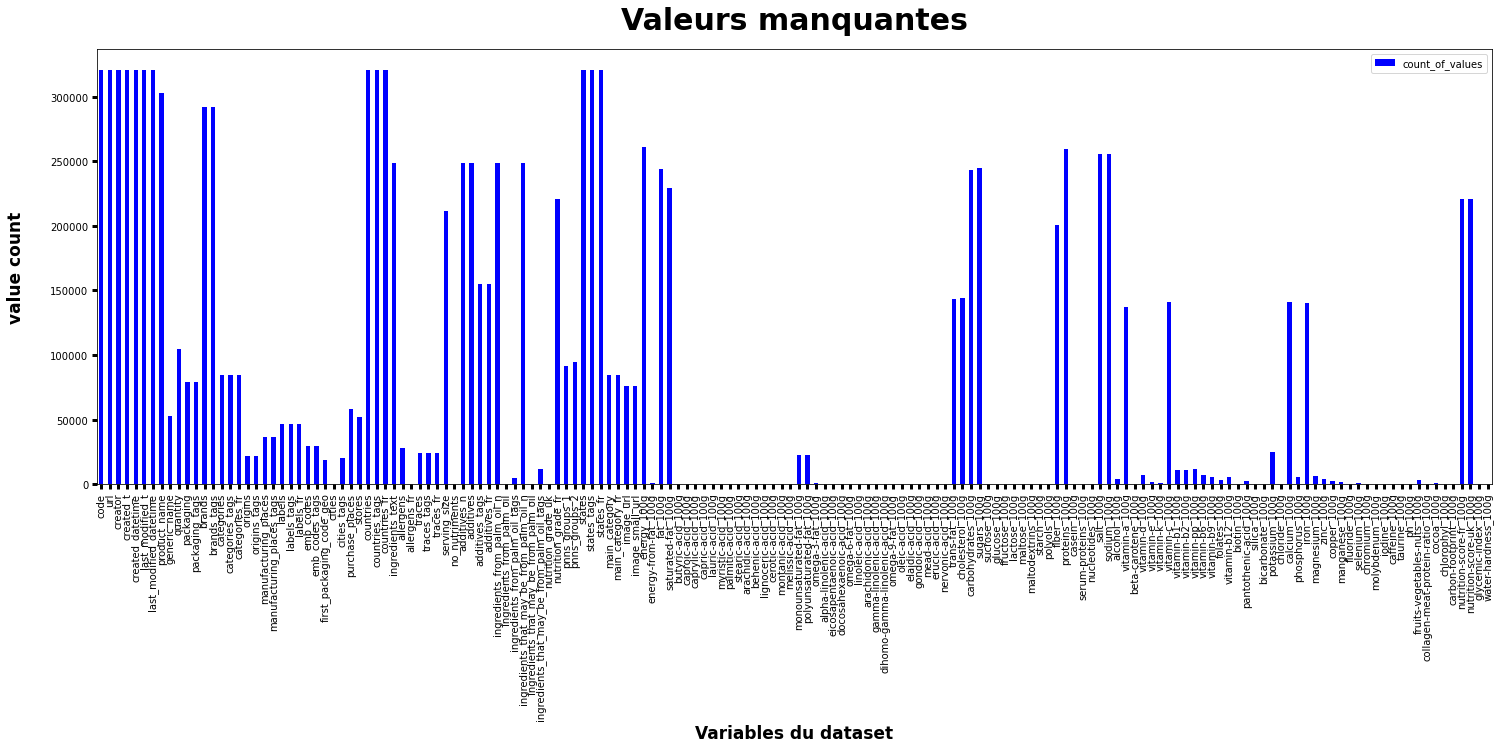

In [91]:
# Plotting du tableau 'k' contenant le decompte des valeurs nulles et manquantes 
#%matplotlib inline
k.plot.bar(x='variable',y='count_of_values',rot=90,figsize = (25,8),color='blue')

# Custom Axis titles
plt.title('Valeurs manquantes',fontweight='bold', color = 'black', fontsize='30', horizontalalignment='center',pad = 20)
plt.ylabel('value count', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center', labelpad=25)
plt.xlabel('Variables du dataset', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
# Custom ticks
plt.tick_params(axis='x', colors='black', direction='out', length=5, width=3)
plt.tick_params(axis='y', colors='black', direction='out', length=5, width=3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

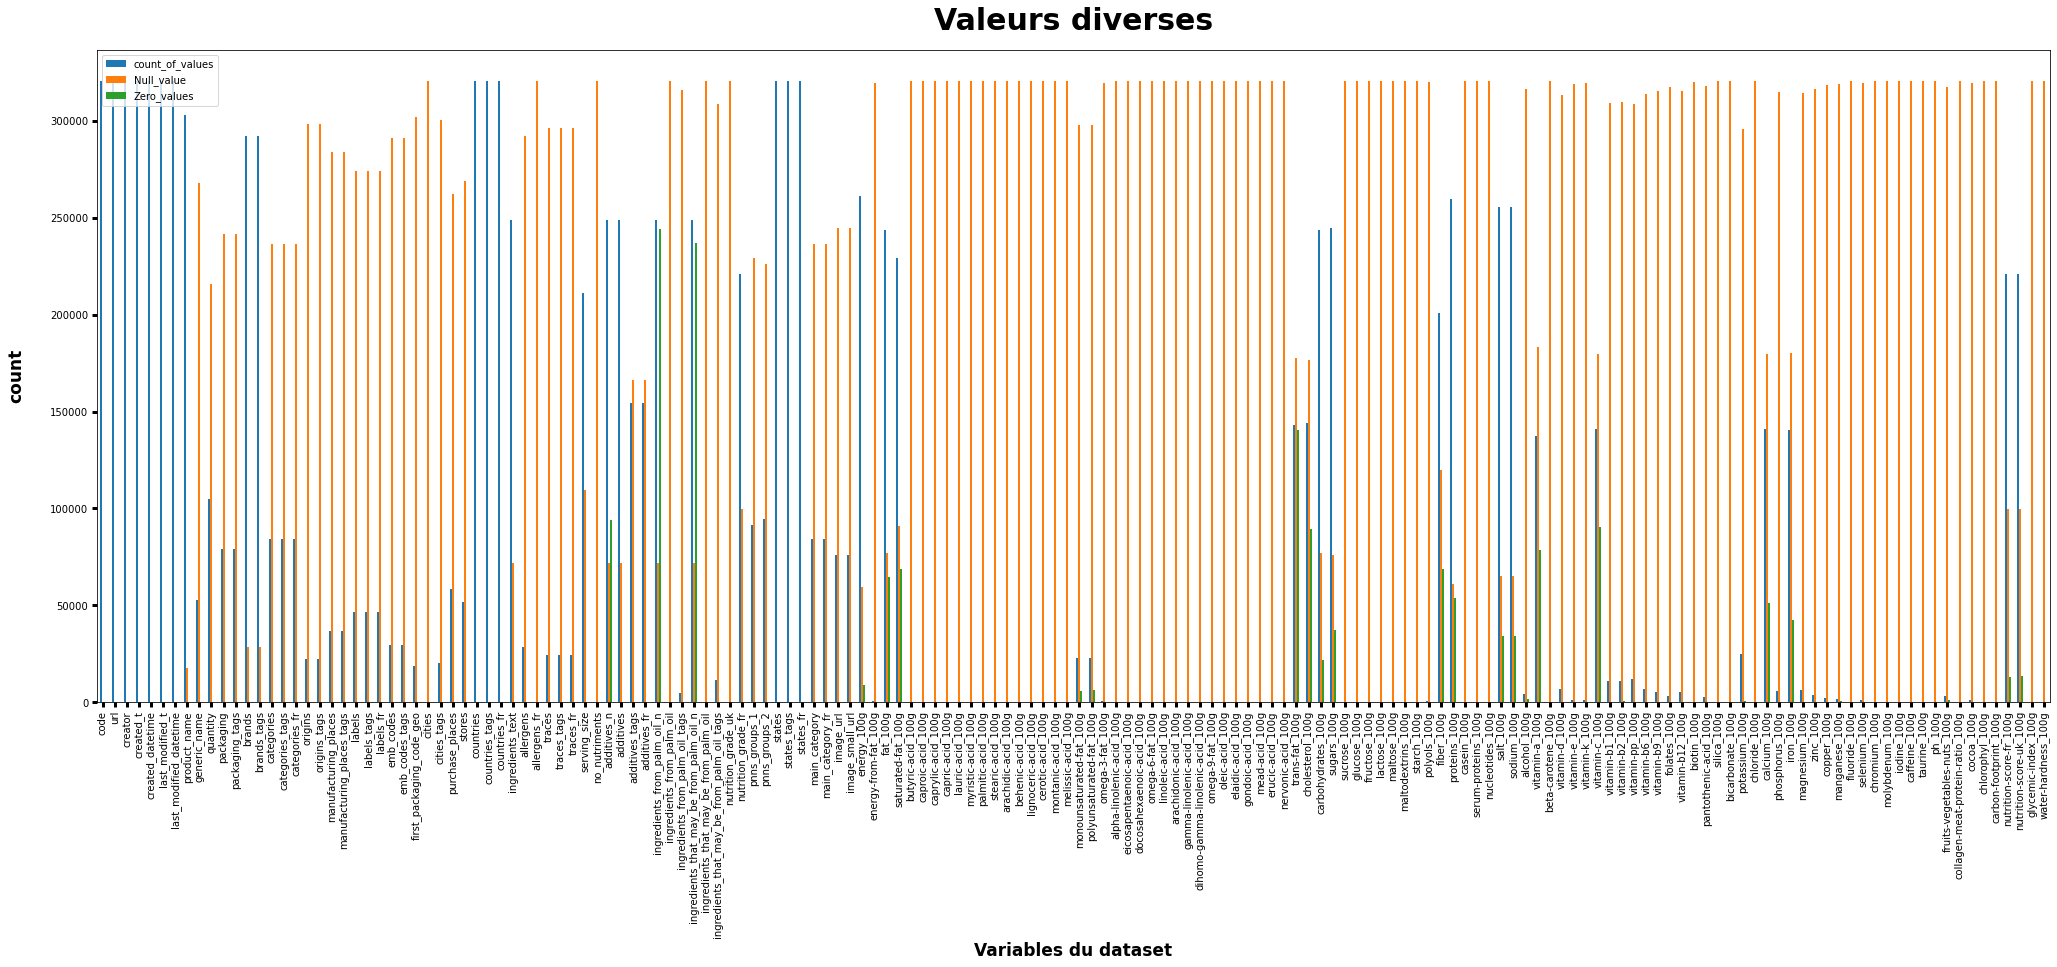

In [92]:
# Creation d'un bar plot groupe pour representer l'enseble des valeurs du dataframe 'k'
# Le nombre de colonne 

%matplotlib inline
k.plot.bar(x='variable',rot=90, figsize = (35,12)) #stacked=True, on peut l'ajouter pour stacker les bars
# custom axes labels
plt.title('Valeurs diverses',fontweight='bold', color = 'black', fontsize='30', horizontalalignment='center',pad = 20)
plt.ylabel('count', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center', labelpad=25)
plt.xlabel('Variables du dataset', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')

# Custom ticks
plt.tick_params(axis='x', colors='black', direction='out', length=5, width=3)
plt.tick_params(axis='y', colors='black', direction='out', length=5, width=3)
plt.show

# Eliminer les colonnes a faibles ratio de diponibilite data et/ou qui sont inutiles
# Fusionner les colonnes qui contiennent des informations similaires

In [93]:
# determination des colonnes completement nulles pour les eliminer du dataset et reduire sa taille
k.query('count_of_values==0')

,variable,count_of_values,Null_value,dtype,Zero_values
41,no_nutriments,0,320772,float64,0
47,ingredients_from_palm_oil,0,320772,float64,0
50,ingredients_that_may_be_from_palm_oil,0,320772,float64,0
52,nutrition_grade_uk,0,320772,float64,0
67,butyric-acid_100g,0,320772,float64,0
68,caproic-acid_100g,0,320772,float64,0
77,lignoceric-acid_100g,0,320772,float64,0
78,cerotic-acid_100g,0,320772,float64,0
80,melissic-acid_100g,0,320772,float64,0
94,elaidic-acid_100g,0,320772,float64,0


In [94]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [95]:
# Ces colonnes peuvent etre alimentes par des donnees specifiques aux produits declares dans le dataset
# on suppose que ces produits n'interferent pas avec les variables a etudier lors de la suite de l'analyse
# Alimenter ces donnes en valeurs fiables via une recherche externe ne fait pas partie des objectifs de ce projet
# Reaffectation du dataset et elimination des colonnes a valeurs nulles 
df2 = df
df2 = df2.dropna(axis='columns',how='all')
df2.shape

(320772, 146)

In [96]:
df2.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'cocoa_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object', length=146)

In [97]:
#pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [98]:
# Utiliser la colonne 'code' comme index de la table :
# A utiliser apres finalisation du nettoyage du dataset
# df2.set_index('code', inplace=True)

In [99]:
# traitement de la colonne 'cities' : 
# La colonne comporte des donnees inutilisables et en faible ratio de disponibilite.

In [100]:
df2[df2['cities'].notnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,NaN,NaN,NaN,NaN,125 g (1 pot),NaN,6,[ lait-entier -> fr:lait-entier ] [ lait ->...,"en:e1422,en:e440,en:e412,en:e120,en:e160c,en:e101","E1422 - Adipate de diamidon acétylé,E440 - Pec...",0,NaN,NaN,0,NaN,NaN,NaN,b,Milk and dairy products,Milk and yogurt,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:whole-milk-yogurts,Yaourts entiers,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,95.2,NaN,3.2,2.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,12.8,NaN,NaN,NaN,NaN,NaN,0.24,3.44,NaN,NaN,NaN,0.1630,0.064000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Dia,Sogeres",France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,6,[ lait-entier -> fr:lait-entier ] [ lait ->...,"en:e440,en:e410,en:e412,en:e333,en:e120,en:e163","E440 - Pectines,E410 - Farine de graines de ca...",0,NaN,NaN,0,NaN,NaN,NaN,b,Milk and dairy products,Milk and yogurt,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,

In [101]:
df2['cities'].value_counts(dropna=False)

NaN    320749
c           9
a           8
b           6
Name: cities, dtype: int64

In [102]:
df2.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3

In [103]:
# suppression de la colonne 'cities' apres examination de son contenu 
df2.drop('cities', axis=1, inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [104]:
# suppression de la colonne 'allergens_fr' apres examination de son contenu et l'existance de la colonne 'allergens'

In [105]:
df2.drop('allergens_fr', axis=1, inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [106]:
df2.shape

(320772, 144)

# Traitement des colonnes 'Date & time' :

In [107]:
# suppresion de la colonne 'created_t' vu la disponibilite de la colonne 'created_datetime'
df2.drop('created_t', axis=1, inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [108]:
# suppression de la colonne 'last_modified_t' vu la disponibilite de la colonne ' last_modified_datetime'
df2.drop('last_modified_t', axis=1, inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [109]:
df2.shape

(320772, 142)

In [110]:
df2['last_modified_datetime'].dtypes

dtype('O')

In [111]:
# Cast des valeurs de la colonne 'last_modified_datetime' en format datetime au lieu de string
df2['last_modified_datetime'] = pd.to_datetime(df2['last_modified_datetime'],errors='coerce')

<ipython-input-111-dc5338f9cac5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['last_modified_datetime'] = pd.to_datetime(df2['last_modified_datetime'],errors='coerce')


In [112]:
# Cast des valeurs de la colonne 'created_datetime' en format datetime au lieu de string
df2['created_datetime'] = pd.to_datetime(df2['created_datetime'],errors='coerce')

<ipython-input-112-010bad915c9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['created_datetime'] = pd.to_datetime(df2['created_datetime'],errors='coerce')


In [113]:
df2['last_modified_datetime'].dtypes

datetime64[ns, UTC]

In [114]:
df2['created_datetime'].dtypes

datetime64[ns, UTC]

In [115]:
df2['created_datetime'].isna().sum()

24

In [116]:
df2['last_modified_datetime'].isna().sum()

23

In [117]:
df2.shape

(320772, 142)

In [118]:
df2.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'generic_name', 'quantity', 'packaging',
       'packaging_tags',
       ...
       'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'cocoa_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object', length=142)

# Traitement des colonnes 'product_name' et 'generic_name'

In [119]:
df2['product_name'].value_counts()

Ice Cream                                   410
Extra Virgin Olive Oil                      303
Potato Chips                                281
Premium Ice Cream                           226
Tomato Ketchup                              182
                                           ... 
18 dosettes universelles                      1
B-Fresh, Sugar Free Gum, Cinnamon             1
Chocolate Brownie Cookies, Thin & Crispy      1
Sirop de fraise pur sucre                     1
Mini galettes de riz Sweet Chili              1
Name: product_name, Length: 221347, dtype: int64

In [120]:
# On va essayer de trouver une relation entre 'product_name' et 'generic_name' pour prevoir une methode re remplissage 
# des valeurs manquantes.

In [121]:
# Exemple avec le produit 'Ice cream'
# Une seule valeur est dispo pour generic_name pour ce produit et il n'est pas evident de l'apposer a tt les valeures
# manquantes du produit 'ice cream'
df6 = df2[df2['product_name']=='Ice Cream']
df6

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1753,11110004659,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-10 09:36:22+00:00,2017-03-10 09:36:22+00:00,Ice Cream,NaN,NaN,NaN,NaN,Private Selection,private-selection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Ice cream - milk, cream, sugar, corn syrup, na...",NaN,NaN,NaN,NaN,85 g (0.5 cup),4.0,[ ice-cream -> en:ice-cream ] [ cream -> en...,"en:e412,en:e410,en:e466,en:e150a","E412 - Gomme de guar,E410 - Farine de graines ...",0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1134.0,NaN,14.12,9.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.047,30.59,25.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.71,NaN,NaN,NaN,0.20828,0.082,NaN,0.000141,NaN,NaN,NaN,NaN,0.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0
1825,11110014368,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-10 08:18:41+00:00,2017-03-10 08:18:41+00:00,Ice Cream,NaN,NaN,NaN,NaN,Prrivate Selection,prrivate-selection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Ice cream - milk, cream, sugar, corn syrup, wh...",NaN,NaN,NaN,NaN,84 g (0.5 cup),4.0,[ ice-cream -> en:ice-cream ] [ cream -> en...,"en:e412,en:e410,en:e466,en:e407","E412 - Gomme de guar,E410 - Farine de graines ...",0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,

In [122]:
pd.set_option('display.max_columns', None)
df6[df6['generic_name'].isnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1753,11110004659,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-10 09:36:22+00:00,2017-03-10 09:36:22+00:00,Ice Cream,NaN,NaN,NaN,NaN,Private Selection,private-selection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Ice cream - milk, cream, sugar, corn syrup, na...",NaN,NaN,NaN,NaN,85 g (0.5 cup),4.0,[ ice-cream -> en:ice-cream ] [ cream -> en...,"en:e412,en:e410,en:e466,en:e150a","E412 - Gomme de guar,E410 - Farine de graines ...",0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1134.0,NaN,14.12,9.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.047,30.59,25.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.71,NaN,NaN,NaN,0.20828,0.082,NaN,0.000141,NaN,NaN,NaN,NaN,0.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0
1825,11110014368,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-10 08:18:41+00:00,2017-03-10 08:18:41+00:00,Ice Cream,NaN,NaN,NaN,NaN,Prrivate Selection,prrivate-selection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Ice cream - milk, cream, sugar, corn syrup, wh...",NaN,NaN,NaN,NaN,84 g (0.5 cup),4.0,[ ice-cream -> en:ice-cream ] [ cream -> en...,"en:e412,en:e410,en:e466,en:e407","E412 - Gomme de guar,E410 - Farine de graines ...",0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,

In [123]:
df6.shape

(410, 142)

In [124]:
df6[df6['generic_name'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
269736,5000159491150,http://world-fr.openfoodfacts.org/produit/5000...,tacite,2016-04-07 21:48:40+00:00,2016-08-28 08:39:05+00:00,Ice Cream,"Crème glacée à la noix de coco, enrobage cacao...",391 g (501 ml),"carton,surgelé","carton,surgele",Bounty,bounty,"Snacks sucrés,Barres,Desserts,Surgelés,Dessert...","en:sugary-snacks,en:desserts,en:frozen-foods,e...","Snacks sucrés,Desserts,Surgelés,Desserts glacé...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Courrières,France",Cora,France,en:france,France,"_Lait_ écrémé (20%), sucre, crème légère (_lai...","Lait, lait, lait, lait, lait, blé, blé, lait, ...","Fruits à coque,Arachides","en:nuts,en:peanuts","Fruits à coque,Arachides","50,1 ml",6.0,[ lait-ecreme -> fr:lait-ecreme ] [ lait ->...,"en:e500,en:e322,en:e471,en:e407,en:e410,en:e412","E500 - Carbonates de sodium,E322 - Lécithines,...",1.0,huile-de-palme,1.0,e471-mono-et-diglycerides-d-acides-gras-alimen...,d,Milk and dairy products,Ice cream,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:ice-creams,Glaces,http://fr.openfoodfacts.org/images/products/50...,http://fr.openfoodfacts.org/images/products/50...,1119.0,NaN,16.0,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.5,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN,0.11,0.043307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0


In [125]:
df6.generic_name.isnull().sum()

409

In [126]:
# Exemple avec le produit 'potato chips'
# Aucune valeur disponible pour la variable 'generic_name' et donc impossibilite d'utiliser cette colonne comme source 
# de donnees.
df7 = df2[df2['product_name']=='Potato Chips']
df7[df7['generic_name'].isnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
3258,11110807595,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-10 08:49:53+00:00,2017-03-10 08:49:53+00:00,Potato Chips,NaN,NaN,NaN,NaN,Fredmeyer,fredmeyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Potatoes, vegetable oil (corn, sunflower, and/...",NaN,NaN,NaN,NaN,28 g (24 CHIPS | ABOUT),3.0,[ potatoes -> en:potatoes ] [ vegetable-oil...,"en:e262ii,en:e296,en:e330","E262ii,E296 - Acide malique,E330 - Acide citrique",0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243.0,NaN,35.71,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.93,21.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,53.57,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,1.81356,0.714,NaN,0.0,NaN,NaN,NaN,NaN,0.0321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
5781,11150224864,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,2017-03-09 09:49:19+00:00,2017-03-09 09:49:19+00:00,Potato Chips,NaN,NaN,NaN,NaN,Roundy's,roundy-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Potatoes, sunflower and/or canola oil, sugar, ...",NaN,NaN,NaN,NaN,28 g (1 oz),3.0,[ potatoes -> en:potatoes ] [ sunflower-and...,"en:e262ii,en:e296,en:e330","E262ii,E296 - Acide malique,E330 - Acide citrique",0.0,NaN,0.0,NaN,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN

In [127]:
df7[df7['generic_name'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [128]:
df7.shape

(281, 142)

In [129]:
# Exemple avec le produit 'Nutella'
# Diverses valeures disponibles pour le 'generic_name' en differentes langues
df2[df2['product_name']=='Nutella']

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
238,80135876,http://world-fr.openfoodfacts.org/produit/0000...,canieatthis-app,2016-11-21 12:05:48+00:00,2016-11-21 12:05:48+00:00,Nutella,NaN,400g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:RO,en:romania,Roumanie,"nuts, cocoa, milk powder",NaN,NaN,NaN,NaN,NaN,0.0,[ nuts -> en:nuts ] [ cocoa -> en:cocoa ] ...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,9800892204,http://world-fr.openfoodfacts.org/produit/0009...,openfoodfacts-contributors,2013-07-02 14:14:24+00:00,2017-01-12 15:10:15+00:00,Nutella,NaN,1 kg,Pot,pot,"Ferrero,Nutella","ferrero,nutella","Produits à tartiner,Petit-déjeuners,Produits à...","en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Produits à tartiner,Petit-déjeuners,Produits à...",NaN,NaN,Canada,canada,Fabriqué au Canada,fr:fabrique-au-canada,Fabrique-au-canada,NaN,NaN,NaN,NaN,Canada,NaN,"France,Suisse,États-Unis,Canada","en:canada,en:france,en:switzerland,en:united-s...","Canada,France,Suisse,États-Unis","Sugar, palm oil, _hazelnuts_, cocoa, skim _mil...","hazelnuts, milk, milk, soja",NaN,NaN,NaN,37 g (2 tbsp),0.0,[ sugar -> en:sugar ] [ palm-oil -> en:palm...,NaN,NaN,0.0,NaN,0.0,NaN,e,Sugary snacks,Sweets,"en:to-be-checked, en:complete, en:nutrition

In [130]:
# Remplacement des valeurs manquantes 'product_name' par les valeurs disponibles de la colonne 'generic_name'
# Il est possible de checker le nom sur la photo URL mais ceci est hors cadre du projet.

In [131]:
df2['product_name'].fillna(df2['generic_name'], inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [132]:
# suppression de la colonne 'generic_name'
df2.drop('generic_name',axis=1, inplace= True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [133]:
df2.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       ...
       'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'cocoa_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object', length=141)

# Traitement des colonnes 'countries'....et 'origins '....

In [134]:
df2[['countries','countries_tags','countries_fr','origins','origins_tags']]

,countries,countries_tags,countries_fr,origins,origins_tags
0,en:FR,en:france,France,NaN,NaN
1,US,en:united-states,États-Unis,NaN,NaN
2,US,en:united-states,États-Unis,NaN,NaN
3,US,en:united-states,États-Unis,NaN,NaN
4,US,en:united-states,États-Unis,NaN,NaN
...,...,...,...,...,...
320767,en:RO,en:romania,Roumanie,NaN,NaN
320768,US,en:united-states,États-Unis,NaN,NaN
320769,China,en:china,Chine,NaN,NaN
320770,en:FR,en:france,France,NaN,NaN


In [135]:
df2['origins'].value_counts(dropna=False)

NaN                                                                 298582
France                                                                5171
España                                                                 569
Italie                                                                 473
Australia                                                              434
                                                                     ...  
Provence,Var                                                             1
Cádiz (provincia),Andalucía,España                                       1
Spain,Italy,Greece,Tunisia                                               1
France,coopérative CORAB Poitou-Charente,agriculture UE / non UE         1
Sri Lanka,Ceylan                                                         1
Name: origins, Length: 4841, dtype: int64

In [136]:
df2['origins_tags'].value_counts(dropna=False)

NaN                                                298619
france                                               5303
union-europeenne                                      625
espana                                                589
italie                                                506
                                                    ...  
source-cristal-roc-cristaline                           1
zi-les-giraumeries,saint-berthevin,france               1
kakao,papua-neuguinea                                   1
vertou,france                                           1
amerique-latine,picardie,france,haute-normandie         1
Name: origins_tags, Length: 4373, dtype: int64

In [137]:
pd.set_option('display.max_columns', None)
df2[(df2['countries'].isna())&(df2['origins'].notnull())]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
14313,18627740001,http://world-fr.openfoodfacts.org/produit/0018...,ppoppy,2012-04-27 14:47:56+00:00,2015-08-09 17:35:45+00:00,Go Lean Cereals,400gr,"Boîte,carton,Plastique","boite,carton,plastique",Kashi,kashi,"Céréales,épicerie","en:cereales,en:epicerie","en:Cereales,en:Epicerie",États-Unis,etats-unis,NaN,NaN,Bio,en:bio,en:Bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOY GRITS, KASHI SEVEN WHOLE GRAINS & SESAME (...",NaN,"soybean,wheat","en:gluten,en:soybeans","Gluten,Soja",52g,1.0,[ soy-grits -> en:soy-grits ] [ grits -> en...,en:e170,E170 - Carbonate de calcium,0.0,NaN,0.0,NaN,a,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:cereales,en:Cereales,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,1130.0,NaN,1.92,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.70,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.20,25.00,NaN,NaN,NaN,0.415,0.163000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.923,NaN,11.50000,NaN,19.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-4.0
26670,308151,http://world-fr.openfoodfacts.org/produit/0030...,ppoppy,2012-04-27 13:36:49+00:00,2015-07-11 06:49:51+00:00,Very Berry Clusters Cereal,369gr,"Carton,plastique,boîte","carton,plastique,boite",Trader's Joe,trader-s-joe,Céréales,en:cereales,en:Cereales,États-Unis,etats-unis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trader Joes,NaN,NaN,NaN,"Whole rolled oats, milled cane sugar, corn flo...",NaN,"Gluten,Soybeans,Tree nuts","en:gluten,en:soybeans,en:tree-nuts","Gluten,Soja,en:Tree-nuts",5

In [138]:
# Verification de la disponibilite des data au niveau des colonnes ci dessous
# il semble qu'un merge ou l'utilisation d'une seule colonne est possible pour la suite du projet
# On ajoutera les informations de la colonne ' origins' au niveau des valeurs manquantes.
pd.set_option('display.max_columns', None)
df2[(df2['countries'].isna())|(df2['countries_tags'].isna())|(df2['countries_fr'].isna())]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
556,30908,http://world-fr.openfoodfacts.org/produit/0003...,openfoodfacts-contributors,2015-04-23 20:45:31+00:00,2015-04-26 15:31:30+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10626,13000001243,http://world-fr.openfoodfacts.org/produit/0013...,date-limite-app,2015-06-10 02:54:06+00:00,2016-04-23 17:26:44+00:00,Ketchup Heinze,NaN,NaN,NaN,NaN,NaN,Ketchup,"en:groceries,en:sauces,en:tomato-sauces,en:ket...","Epicerie,Sauces,Sauces tomate,Ketchup",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",en:groceries,Epicerie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [139]:
pd.set_option('display.max_columns', None)
df2[(df2['countries'].isna())&(df2['countries_tags'].isna())&(df2['countries_fr'].isna())]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
556,30908,http://world-fr.openfoodfacts.org/produit/0003...,openfoodfacts-contributors,2015-04-23 20:45:31+00:00,2015-04-26 15:31:30+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10626,13000001243,http://world-fr.openfoodfacts.org/produit/0013...,date-limite-app,2015-06-10 02:54:06+00:00,2016-04-23 17:26:44+00:00,Ketchup Heinze,NaN,NaN,NaN,NaN,NaN,Ketchup,"en:groceries,en:sauces,en:tomato-sauces,en:ket...","Epicerie,Sauces,Sauces tomate,Ketchup",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",en:groceries,Epicerie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [140]:
# Transfere des donnes non nulles des colonnes 'origins' et 'origins_tags' vers la colonne 'countries'

In [141]:
# Nombre des valeurs manquantes avant transfere de donnees
df2['countries'].isna().sum()

280

In [142]:
df2['countries'].fillna(df2['origins'],inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [143]:
# Nombre de valeurs manquantes apres transfere de donnees
df2['countries'].isna().sum()

250

In [144]:
# transfere de donnees de la colonne 'origins_tags' vers la colonne 'countries'
df2['countries'].fillna(df2['origins_tags'],inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [145]:
# Nombre des valeurs manqauntes apres transfere
# On remarque qu'il n'ya pas de changement.
df2['countries'].isna().sum()

250

In [146]:
# transfere des donnees de la colonne 'cities_tags' a la colonne 'countries'

In [147]:
df2['cities_tags'].value_counts(dropna=False)

NaN                                                                          300452
theix-morbihan-france                                                           270
douarnenez-finistere-france                                                     154
sable-sur-sarthe-sarthe-france                                                  146
saint-martin-des-entrees-calvados-france                                        136
                                                                              ...  
poullaouen-finistere-france                                                       1
radenac-morbihan-france                                                           1
heillecourt-meurthe-et-moselle-france,houdemont-meurthe-et-moselle-france         1
pont-d-hery-jura-france                                                           1
isle-sur-la-sorgue-vaucluse-france,macon-saone-et-loire-france                    1
Name: cities_tags, Length: 2573, dtype: int64

In [148]:
df2['countries'].fillna(df2['cities_tags'],inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [149]:
# On constate que 2 valeurs supplementaires ont etes ajoutees a la colonne 'countries'
df2['countries'].isna().sum()

248

In [150]:
# suppression de la colonne 'cities_tags'

In [151]:
df2.drop('cities_tags',axis=1,inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [152]:
df2.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       ...
       'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'cocoa_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object', length=140)

In [153]:
# Elimination des colonnes relatives aux pays d'origine non necessaires pour la suite du projet
# 'origins', 'origins_tags', 'countries_fr', 'countries_tags'

In [154]:
df2.drop(['origins','origins_tags','countries_fr','countries_tags'], axis=1,inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
df2.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       ...
       'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'cocoa_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object', length=136)

In [156]:
df2.shape

(320772, 136)

In [157]:
df2.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0


# Traitement des colonnes 'brands ' et 'brands_tags' qui sont utiles a l'identification du produit :

In [158]:
df2['brands'].value_counts(dropna=False)

NaN                         28412
Carrefour                    2978
Auchan                       2340
U                            2050
Meijer                       1995
                            ...  
Beach Flower                    1
Sans marque,Geyer frères        1
K F Foods Inc                   1
Columbus Frischei GmbH          1
Dipa                            1
Name: brands, Length: 58785, dtype: int64

In [159]:
df2['brands_tags'].value_counts(dropna=False)

NaN                         28420
carrefour                    3149
auchan                       2468
u                            2082
meijer                       1996
                            ...  
nestle,maggi                    1
copechamp                       1
caddy-shack                     1
brood                           1
the-pickle-juice-company        1
Name: brands_tags, Length: 50254, dtype: int64

In [160]:
# Verification des lignes ou la marque n'est pas mentionnee
df2[(df2['brands'].isna())&(df2['brands_tags'].isna())]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.0,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,2015-06-17 08:45:04+00:00,2015-06-17 10:11:54+00:00,Filet de bœuf,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",fr:filet-de-boeuf,Filet-de-boeuf,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [161]:
# On procede au merge de ces deux colonnes 

In [162]:
df2['brands'].isna().sum()

28412

In [163]:
df2['brands'].fillna(df2['brands_tags'], inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [164]:
df2['brands'].isna().sum()

28410

In [165]:
# On procede a la suppression de la colonne 'brands_tags'

In [166]:
df2.drop('brands_tags', axis=1, inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [167]:
df2.shape

(320772, 135)

# Verification  et Exploration des colonnes a donnees 
# numeriques a tres faibles ratio de disponibilite

In [168]:
# Acid caprylic-acid : prylic acid is a type of beneficial saturated fatty acid that has antibacterial, 
# antiviral, antifungal and anti-inflammatory properties.
# Colonne a garder

In [169]:
df2[df2['caprylic-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
175612,2000000014970,http://world-fr.openfoodfacts.org/produit/2000...,hangy,2015-01-28 17:51:24+00:00,2015-11-04 15:07:11+00:00,Coconpure,460 g,Plastic,plastic,"MP Max,MyProtein","Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Sri Lanka,sri-lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Organic Virgin Coconut Oil,NaN,NaN,NaN,NaN,15 g,0.0,[ organic-virgin-coconut-oil -> en:organic-vi...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:vegetable-oils,Huiles,http://fr.openfoodfacts.org/images/products/20...,http://fr.openfoodfacts.org/images/products/20...,3760.0,NaN,100.0,NaN,7.4,6.2,49.3,18.9,8.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,5.9,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
# Capric- acid :Capric acid (C10) is a naturally occurring fatty acids in coconut oil and palm kernel oil. 
#It is used as a chemical intermediate in the production of esters which are used for perfumes, 
#lubricants, greases, rubber, dyes, and plastics.
# Colonne a garder

In [171]:
df2[df2['capric-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
153710,822078961003,http://world-fr.openfoodfacts.org/produit/0822...,b7,2016-11-26 16:12:07+00:00,2016-11-30 23:52:35+00:00,Huile de Noix de Coco,445 ml,Pot de verre,pot-de-verre,Botanica,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,"Kascher,Biologique Canada","en:organic,en:kosher,en:canada-organic","Bio,Kascher,Biologique Canada",NaN,NaN,NaN,Brossard (Québec),TAU,Canada,"Huile de Noix de coco pressée à froid, biologique",NaN,NaN,NaN,NaN,15 ml / 1 c à soupe,0.0,[ huile-de-noix-de-coco-pressee-a-froid -> fr...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:vegetable-oils,Huiles,NaN,NaN,3630.0,NaN,93.3,83.3,NaN,5.88,46.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175612,2000000014970,http://world-fr.openfoodfacts.org/produit/2000...,hangy,2015-01-28 17:51:24+00:00,2015-11-04 15:07:11+00:00,Coconpure,460 g,Plastic,plastic,"MP Max,MyProtein","Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Sri Lanka,sri-lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Organic Virgin Coconut Oil,NaN,NaN,NaN,NaN,15 g,0.0,[ organic-virgin-coconut-oil -> en:organic-vi...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-ch

In [172]:
# Lauric- acid : saturated fat and is used as medecine. can be founf in coconut oil.
# On constate qu'il y'a des valeurs manquantes par rapport a certains composants.
# Colonne a garder

In [173]:
df2[df2['lauric-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
153710,822078961003,http://world-fr.openfoodfacts.org/produit/0822...,b7,2016-11-26 16:12:07+00:00,2016-11-30 23:52:35+00:00,Huile de Noix de Coco,445 ml,Pot de verre,pot-de-verre,Botanica,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,"Kascher,Biologique Canada","en:organic,en:kosher,en:canada-organic","Bio,Kascher,Biologique Canada",NaN,NaN,NaN,Brossard (Québec),TAU,Canada,"Huile de Noix de coco pressée à froid, biologique",NaN,NaN,NaN,NaN,15 ml / 1 c à soupe,0.0,[ huile-de-noix-de-coco-pressee-a-froid -> fr...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:vegetable-oils,Huiles,NaN,NaN,3630.0,NaN,93.3,83.3,NaN,5.88,46.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175612,2000000014970,http://world-fr.openfoodfacts.org/produit/2000...,hangy,2015-01-28 17:51:24+00:00,2015-11-04 15:07:11+00:00,Coconpure,460 g,Plastic,plastic,"MP Max,MyProtein","Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Sri Lanka,sri-lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Organic Virgin Coconut Oil,NaN,NaN,NaN,NaN,15 g,0.0,[ organic-virgin-coconut-oil -> en:organic-vi...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to

In [174]:
# Myristic- acid : saturated fat and  acts as a lipid anchor in biomembranes.
# Colonne a garder

In [175]:
df2[df2['myristic-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
175612,2000000014970,http://world-fr.openfoodfacts.org/produit/2000...,hangy,2015-01-28 17:51:24+00:00,2015-11-04 15:07:11+00:00,Coconpure,460 g,Plastic,plastic,"MP Max,MyProtein","Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Sri Lanka,sri-lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Organic Virgin Coconut Oil,NaN,NaN,NaN,NaN,15 g,0.0,[ organic-virgin-coconut-oil -> en:organic-vi...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:vegetable-oils,Huiles,http://fr.openfoodfacts.org/images/products/20...,http://fr.openfoodfacts.org/images/products/20...,3760.0,NaN,100.0,NaN,7.4,6.2,49.3,18.9,8.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,5.9,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
# Palmitic- acid : is a fatty used as a food additive and emollient or surfactant in cosmetics.
# Colonne a garder

In [177]:
df2[df2['palmitic-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
175612,2000000014970,http://world-fr.openfoodfacts.org/produit/2000...,hangy,2015-01-28 17:51:24+00:00,2015-11-04 15:07:11+00:00,Coconpure,460 g,Plastic,plastic,"MP Max,MyProtein","Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Sri Lanka,sri-lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Organic Virgin Coconut Oil,NaN,NaN,NaN,NaN,15 g,0.0,[ organic-virgin-coconut-oil -> en:organic-vi...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:vegetable-oils,Huiles,http://fr.openfoodfacts.org/images/products/20...,http://fr.openfoodfacts.org/images/products/20...,3760.0,NaN,100.0,NaN,7.4,6.2,49.3,18.9,8.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,5.9,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# Stearic - acid : Stearic acid is an emulsifier, emollient, and lubricant that can soften skin and help to keep products from separating.
# Colonne a garder

In [179]:
df2[df2['stearic-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
175612,2000000014970,http://world-fr.openfoodfacts.org/produit/2000...,hangy,2015-01-28 17:51:24+00:00,2015-11-04 15:07:11+00:00,Coconpure,460 g,Plastic,plastic,"MP Max,MyProtein","Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Sri Lanka,sri-lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Organic Virgin Coconut Oil,NaN,NaN,NaN,NaN,15 g,0.0,[ organic-virgin-coconut-oil -> en:organic-vi...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:vegetable-oils,Huiles,http://fr.openfoodfacts.org/images/products/20...,http://fr.openfoodfacts.org/images/products/20...,3760.0,NaN,100.0,NaN,7.4,6.2,49.3,18.9,8.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,5.9,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
# Arachidic - acid : is an essential fatty acid, which is consumed in small amounts in our regular diets. 
#It is considered an "essential" fatty acid because it is an absolute requirement for the proper functioning 
#for the human body
# Le reste des colonnes affiche de nombreuses irregularites /
# Colonne a garder

In [181]:
df2[df2['arachidic-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,NaT,NaT,"Belgique,France",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,6,"E1422 - Adipate de diamidon acétylé,E440 - Pec...",0,NaN,NaN,0,NaN,NaN,NaN,Milk and yogurt,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...",Yaourts entiers,http://fr.openfoodfacts.org/images/products/30...,95.2,NaN,3.2,2.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.100,12.8,NaN,NaN,NaN,NaN,NaN,0.24,3.440,NaN,NaN,NaN,0.1630,0.064000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400,NaN,NaN,NaN,NaN,2.000000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...",NaT,NaT,France,"Lait, lait, crème",NaN,NaN,NaN,125 g (1 pot),NaN,6,"E440 - Pectines,E410 - Farine de graines de ca...",0,NaN,NaN,0,NaN,NaN,NaN,Milk and yogurt,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...",Yaourts entiers,http://fr.openfoodfacts.org/images/products/30...,393,NaN,2.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.100,12.9,NaN,NaN,NaN,NaN,NaN,0.20,3.600,NaN,NaN,NaN,0.1270,0.050000,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000,NaN,NaN,NaN,NaN,2.000000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,NaT,NaT,"Belgique,France,Suisse",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,4,"E1422 - Adipate de d

In [182]:
df2[df2['arachidic-acid_100g'].notnull()].shape

(24, 135)

In [183]:
# behenic-acid : is important to help provide a protective barrier against the environment in order to maintain good 
#skin quality
# # Colonne a garder

In [184]:
df2[df2['behenic-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,NaT,NaT,"Belgique,France",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,6,"E1422 - Adipate de diamidon acétylé,E440 - Pec...",0,NaN,NaN,0,NaN,NaN,NaN,Milk and yogurt,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...",Yaourts entiers,http://fr.openfoodfacts.org/images/products/30...,95.2,NaN,3.2,2.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,12.8,NaN,NaN,NaN,NaN,NaN,0.24,3.44,NaN,NaN,NaN,0.1630,0.064000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...",NaT,NaT,France,"Lait, lait, crème",NaN,NaN,NaN,125 g (1 pot),NaN,6,"E440 - Pectines,E410 - Farine de graines de ca...",0,NaN,NaN,0,NaN,NaN,NaN,Milk and yogurt,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...",Yaourts entiers,http://fr.openfoodfacts.org/images/products/30...,393,NaN,2.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,12.9,NaN,NaN,NaN,NaN,NaN,0.20,3.60,NaN,NaN,NaN,0.1270,0.050000,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,NaT,NaT,"Belgique,France,Suisse",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,4,"E1422 - Adipate de diamidon acétylé,E440 - Pec

In [185]:
df2[df2['behenic-acid_100g'].notnull()].shape

(23, 135)

In [186]:
# Montanic-acid :Montanic acid is a saturated fatty acid isolated and detected mainly in montan wax. 
# It also occurs in beeswax and Chinese wax. Montanic acid ethylene glycol esters and glycerol esters 
# are used as protective layer on fruit skins and coating on foods.

In [187]:
df2[df2['montanic-acid_100g'].notnull()]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
315385,8717496900630,http://world-fr.openfoodfacts.org/produit/8717...,openfoodfacts-contributors,2016-04-13 16:51:29+00:00,2016-08-07 11:30:24+00:00,Huile d'Olive vierge extra,1 L,"Bouteille,Verre","bouteille,verre",La Bio Idea,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,"Bio,Ecocert,Bio européen,FR-BIO-01,AB Agricult...","en:organic,en:ecocert,en:eu-organic,en:fr-bio-...","Bio,Ecocert,Bio européen,FR-BIO-01,AB Agricult...",NaN,NaN,NaN,NaN,NaN,France,olives biologiques,NaN,NaN,NaN,NaN,NaN,0.0,[ olives-biologiques -> fr:olives-biologiques...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Fat and sauces,Fats,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:olive-oils,Huiles d'olive,http://fr.openfoodfacts.org/images/products/87...,http://fr.openfoodfacts.org/images/products/87...,3700.0,NaN,100.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df2.shape

(320772, 135)

In [189]:
# Sauvegarde du fichier df2 / 
df2.to_csv('df2.csv', index=False)

In [ ]:
# File ok

In [190]:
df3=df2

# Elimination des lignes non utilisables :
# Lignes sans 'product_name'
# Lignes sans 'code'
# Lignes sans 'URL'
# Ligne sans 'creator'

In [191]:
df3.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,1kg,NaN,NaN,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0


In [192]:
# Elimination des lignes avec des items non identifiables

In [193]:
df3.dropna(subset=['code','url','creator','product_name'],inplace=True)

<ipython-input-193-6d6a633bbf89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(subset=['code','url','creator','product_name'],inplace=True)


In [194]:
# identification et traitement des doublons
# Les parametres essentiels a considerer pour les doublons seront 'code' et 'url' pour eviter une confusion d'identification

In [195]:
# Traitement des doublons relatifs a la colonne 'url'
# Le resultat est nul
df3.url.duplicated().value_counts()

False    303105
Name: url, dtype: int64

In [196]:
# Traitement des doublons relatifs a la colonne'code'
df3.code.duplicated().value_counts()

False    303001
True        104
Name: code, dtype: int64

In [197]:
df3.loc[df3.code.duplicated(keep=False),:]

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
6,16117,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Organic Long Grain White Rice,NaN,NaN,NaN,Lundberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Organic long grain white rice,NaN,NaN,NaN,NaN,45 g (0.25 cup),0.0,[ organic-long-grain-white-rice -> en:organic...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,31233,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 10:35:17+00:00,2017-03-09 10:35:17+00:00,35% Fruit And Fiber Muesli,NaN,NaN,NaN,Golden Temple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Whole rolled oats, raisins (raisins, vegetable...",NaN,NaN,NaN,NaN,55 g (0.5 cup),3.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,"en:e422,en:e160b,en:e100","E422 - Glycérol,E160b - Rocou,E100 - Curcumine",0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1523.0,NaN,4.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.91,23.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,10.91,NaN,NaN,NaN,0.18542,0.073000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [198]:
# Verification de la configuaration qui comporte le maximum de donnees 'nutrition-score-fr_100g'

In [199]:
df4 = df3.loc[df3.code.duplicated(keep=False),:]
df4['nutrition-score-fr_100g'].isna().sum()

75

In [200]:
df4 = df3.loc[df3.code.duplicated(keep='first'),:]
df4['nutrition-score-fr_100g'].isna().sum()

43

In [201]:
df4 = df3.loc[df3.code.duplicated(keep='last'),:]
df4['nutrition-score-fr_100g'].isna().sum()

32

In [202]:
df4 = df3.loc[df3.code.duplicated(keep=False),:]
df5 = df4[df4['nutrition-score-fr_100g'].isna()]
df5.code.duplicated().sum()

28

In [203]:
# suppression des doublons avec la configuration 'last'
# Un travail exhaustif impliquera la verification de l'ensemble des data de chaque ligne avec comparaison aux data reeles

In [204]:
df3.drop_duplicates(subset=['code'],keep='last', inplace=True)

<ipython-input-204-5c075ca15e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(subset=['code'],keep='last', inplace=True)


In [205]:
# verification des colonnes 'created_datetime' & 'last_modified_datetime'

In [206]:
df3['created_datetime'].isna().sum()

1

In [207]:
df3['last_modified_datetime'].isna().sum()

0

In [208]:
# Remplacer la valeur nulle par celle disponible dans la colonne 'last_modified_datetime'

In [209]:
df3['created_datetime'].fillna(df3['last_modified_datetime'],inplace=True)

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [210]:
# Resultat ok
df3['created_datetime'].isna().sum()

0

In [211]:
# Verification des resultats :

In [212]:
df3.shape

(303001, 135)

In [213]:
df3.code.duplicated().sum()

0

In [214]:
df3['code'].isna().sum()

0

In [215]:
df3['url'].isna().sum()

0

In [216]:
df3['product_name'].isna().sum()

0

In [217]:
df3['creator'].isna().sum()

0

In [218]:
# Sauvegarde du fichier df3 / 
df3.to_csv('df3.csv', index=False)